QUE 1-Exploratory Data Analysis (EDA) on Australian Weather Dataset.

In [3]:
# 1-Summarize key descriptive statistics for MaxTemp and Rainfall ->

import pandas as pd


df = pd.read_csv("D:\IIIT dharwad\D.S Lab\weatherAUS_endsem.csv")

# Descriptive statistics
descr = df[['MaxTemp', 'Rainfall']].describe()
print(descr)


             MaxTemp       Rainfall
count  144199.000000  142199.000000
mean       23.221348       2.360918
std         7.119049       8.478060
min        -4.800000       0.000000
25%        17.900000       0.000000
50%        22.600000       0.000000
75%        28.200000       0.800000
max        48.100000     371.000000




## **describe() function** gives outputs:

*  Count: The number of non-null observations.
*   Mean: The average value.


*   Std (Standard Deviation): A measure of how spread out the data is.
*   Min (Minimum): The smallest value.

*   25% (First Quartile / Q1): The value below which 25% of the data falls.
*   50% (Median / Second Quartile / Q2): The middle value of the dataset.



*   75% (Third Quartile / Q3): The value below which 75% of the data falls.
*   Max (Maximum): The largest value.em




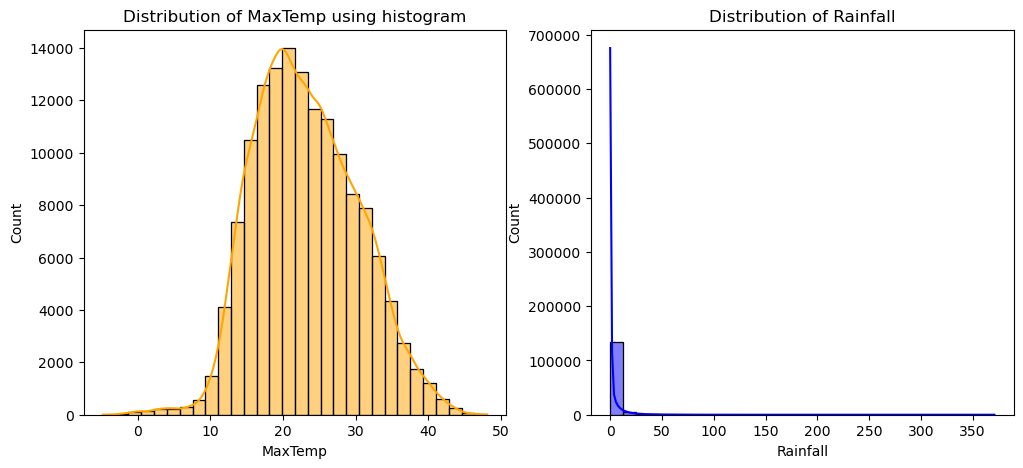

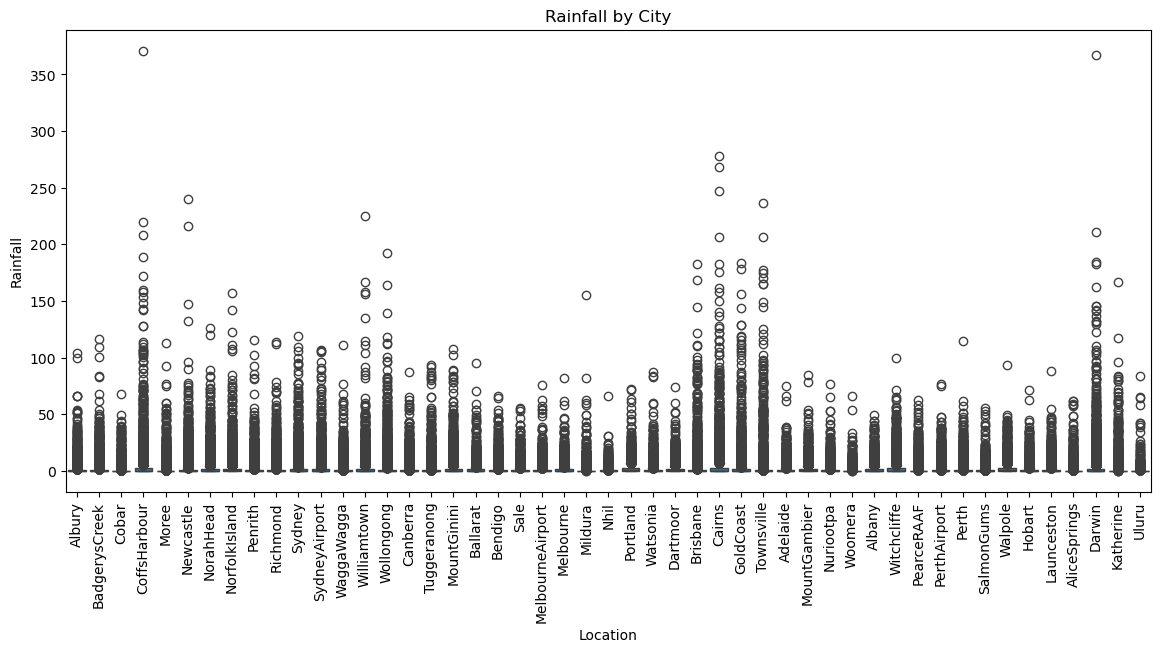

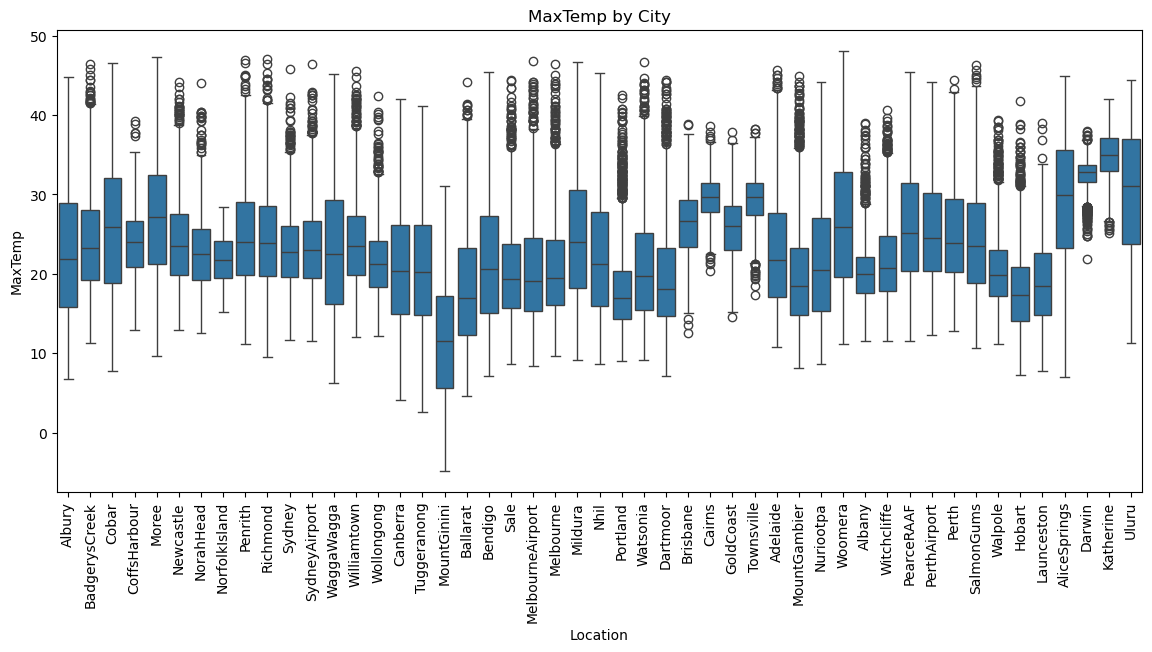

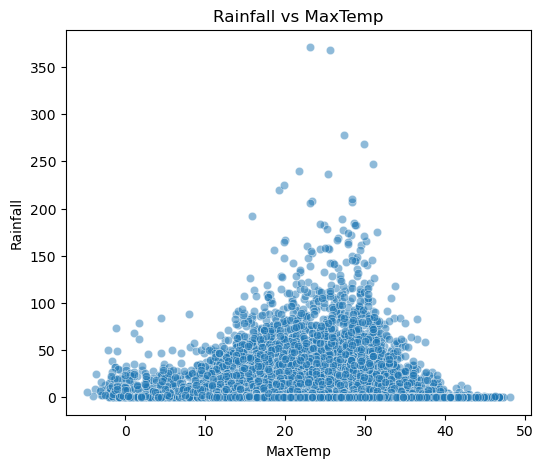

In [4]:
# 2. Create suitable plots to explore distributions and relationships (you may choose histograms, boxplots, scatterplots, or others) for
# Rainfall by city (Location) and MaxTemp by city (Location).

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Maxtemp and rainfall

# Histograms
# Great for seeing general patterns and common values in the dataset.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['MaxTemp'].dropna(), kde=True, bins=30, color='orange')
plt.title("Distribution of MaxTemp using histogram")

plt.subplot(1,2,2)
sns.histplot(df['Rainfall'].dropna(), kde=True, bins=30, color='blue')
plt.title("Distribution of Rainfall")
plt.show()

# Boxplots by Location
# Excellent for comparing cities, identifying which have unusual weather.
plt.figure(figsize=(14,6))
sns.boxplot(x='Location', y='Rainfall', data=df)
plt.xticks(rotation=90)
plt.title("Rainfall by City")
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='Location', y='MaxTemp', data=df)
plt.xticks(rotation=90)
plt.title("MaxTemp by City")
plt.show()

# Scatterplot relation
#  Ideal for checking if there's a direct relationship between temperature and rainfall.
plt.figure(figsize=(6,5))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df, alpha=0.5)
plt.title("Rainfall vs MaxTemp")
plt.show()


**Histograms for Distributions**

-Purpose: Histograms show how data values (Rainfall and MaxTemp) are distributed—basically, how often each value or range of values occurs in the dataset.

**For MaxTemp:**

-The histogram displays how maximum temperature values are spread out for all cities combined.

-The curve (KDE) helps visualize the overall shape of the temperature distribution.

**For Rainfall:**

-Similarly, the histogram displays the spread of rainfall values across all cities.

-The curve (KDE) shows if most cities have low, moderate, or high rainfall.

---

**Boxplots by City (Location)**

-Purpose: Boxplots allow comparison between cities for a particular variable, showing their median, quartiles, and outlier values.

**For Rainfall by City:**

-Each box represents a city.

-The box displays the middle 50% of rainfall values, and lines (whiskers) show more spread-out values.

-Points outside the whiskers are "outliers" (very high or low rainfall).

**For MaxTemp by City:**

-Each box represents a city for maximum temperature.

-It helps to see which cities are generally hotter or colder, and if any have particularly extreme values.

---

**Scatterplot: Rainfall vs. MaxTemp**
-Purpose: Scatterplots show the relationship between two continuous variables.

-This scatterplot reveals whether cities with higher temperatures tend to have more or less rainfall.

-Each dot is a city-date pair; a pattern (such as upward or downward trend) suggests a correlation between rainfall and temperature.

---

3-Based on your visualizations, discuss:
○ Which variables appear skewed?
○ Which variables might strongly influence rainfall or temperature?
○ What anomalies or outliers do you notice?

-Skewness:

-Rainfall is usually positively skewed (many low values, few very high outliers).

-MaxTemp is closer to normal distribution but may vary by city.

Strong Influences:

-Rainfall is likely influenced by humidity, wind speed, and location.

-MaxTemp is influenced by MinTemp and sunshine duration.

Outliers:

-Rainfall has extreme outliers (very heavy rain days).

-Some anomalies may appear in MaxTemp (unexpected very high or very low temperatures for some cities). -->

---
## QUE 2-The dataset contains missing values in features like Sunshine and Evaporation->

In [ ]:
# 1-Find columns with most missing values
# for handling a file we need to know which column has most of the null value percentage
import pandas as pd

df = pd.read_csv("weatherAUS_endsem.csv")

# Find missing values percentage
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False).head(10))

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
dtype: float64


It is clear that column Sunshine and Evaporation has highest missing value.
Now to fill the missing value we will use imputation method-


In [5]:
#2- Two imputation methods (regression,KNN)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("weatherAUS_endsem.csv")

# Backup original columns before imputation
df['Sunshine_original'] = df['Sunshine'].copy()
df['Evaporation_original'] = df['Evaporation'].copy()

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Sunshine_original,Evaporation_original
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN,NaN
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN,NaN
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN,NaN
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN,NaN
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN,NaN


In [6]:

# Cell 2: Identify missing values

missing_percent = df.isnull().mean() * 100
print("Top 10 columns with missing values (%):\n")
print(missing_percent.sort_values(ascending=False).head(10))


Top 10 columns with missing values (%):

Sunshine                48.009762
Sunshine_original       48.009762
Evaporation             43.166506
Evaporation_original    43.166506
Cloud3pm                40.807095
Cloud9am                38.421559
Pressure9am             10.356799
Pressure3pm             10.331363
WindDir9am               7.263853
WindGustDir              7.098859
dtype: float64


In [8]:

# KNN Imputation for Sunshine & Evaporation

df_knn = df.copy()

# Select relevant columns for imputation
subset = df_knn[['Sunshine','Evaporation','MinTemp','MaxTemp','Humidity3pm','Rainfall']]

imputer = KNNImputer(n_neighbors=2)
# using n_neighbors as 2 as it captures local patterns better, reduces run time
# with 2 neighbor randon noise is reduced(balanced bias and variance)
subset_imputed = imputer.fit_transform(subset)

subset_imputed = pd.DataFrame(subset_imputed, columns=subset.columns)

# Putting imputed values back
df_knn['Sunshine'] = subset_imputed['Sunshine']
df_knn['Evaporation'] = subset_imputed['Evaporation']


KNN:-

-Fills missing values using the most similar rows (neighbors).

-Preserves local patterns in the dataset.

-More flexible than mean/median because it adapts to nearby data.

-Can handle both numerical and categorical data.

-Reduces random noise by averaging values from neighbors.

In [ ]:

# Regression Imputation for Sunshine

df_reg = df.copy()

# Regression for Sunshine
features_sun = ['MinTemp','MaxTemp','Humidity3pm','Rainfall']

# Take rows where Sunshine is known AND features are not NaN

known_sun = df_reg[df_reg['Sunshine'].notnull()].dropna(subset=features_sun)
unknown_sun = df_reg[df_reg['Sunshine'].isnull()].dropna(subset=features_sun)

# in Known we got all the  rows in which sunshine is NaN and all the features are there
# removing all the NaN values from the features as regression modal doesn't work without input(NaN values)
# for training all the known values are taken

X_train = known_sun[features_sun]
y_train = known_sun['Sunshine']

model = LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(unknown_sun[features_sun])

# Assigns the predicted values back into the original DataFrame at the correct indices.
df_reg.loc[unknown_sun.index, 'Sunshine'] = predicted

# Regression for Evaporation
features_evap = ['MinTemp','MaxTemp','Humidity9am','Rainfall','Sunshine']
known_evap = df_reg[df_reg['Evaporation'].notnull()].dropna(subset=features_evap)
unknown_evap = df_reg[df_reg['Evaporation'].isnull()].dropna(subset=features_evap)

X_train2 = known_evap[features_evap]
y_train2 = known_evap['Evaporation']

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

predicted2 = model2.predict(unknown_evap[features_evap])
df_reg.loc[unknown_evap.index, 'Evaporation'] = predicted2


Regression :-

-Predicts missing values using relationships with other features.

-More accurate than simple methods like mean or median.

-Preserves the natural variance (spread) of data.

-Reduces bias by keeping values consistent with patterns.

-Works well for continuous variables like Sunshine and Evaporation.

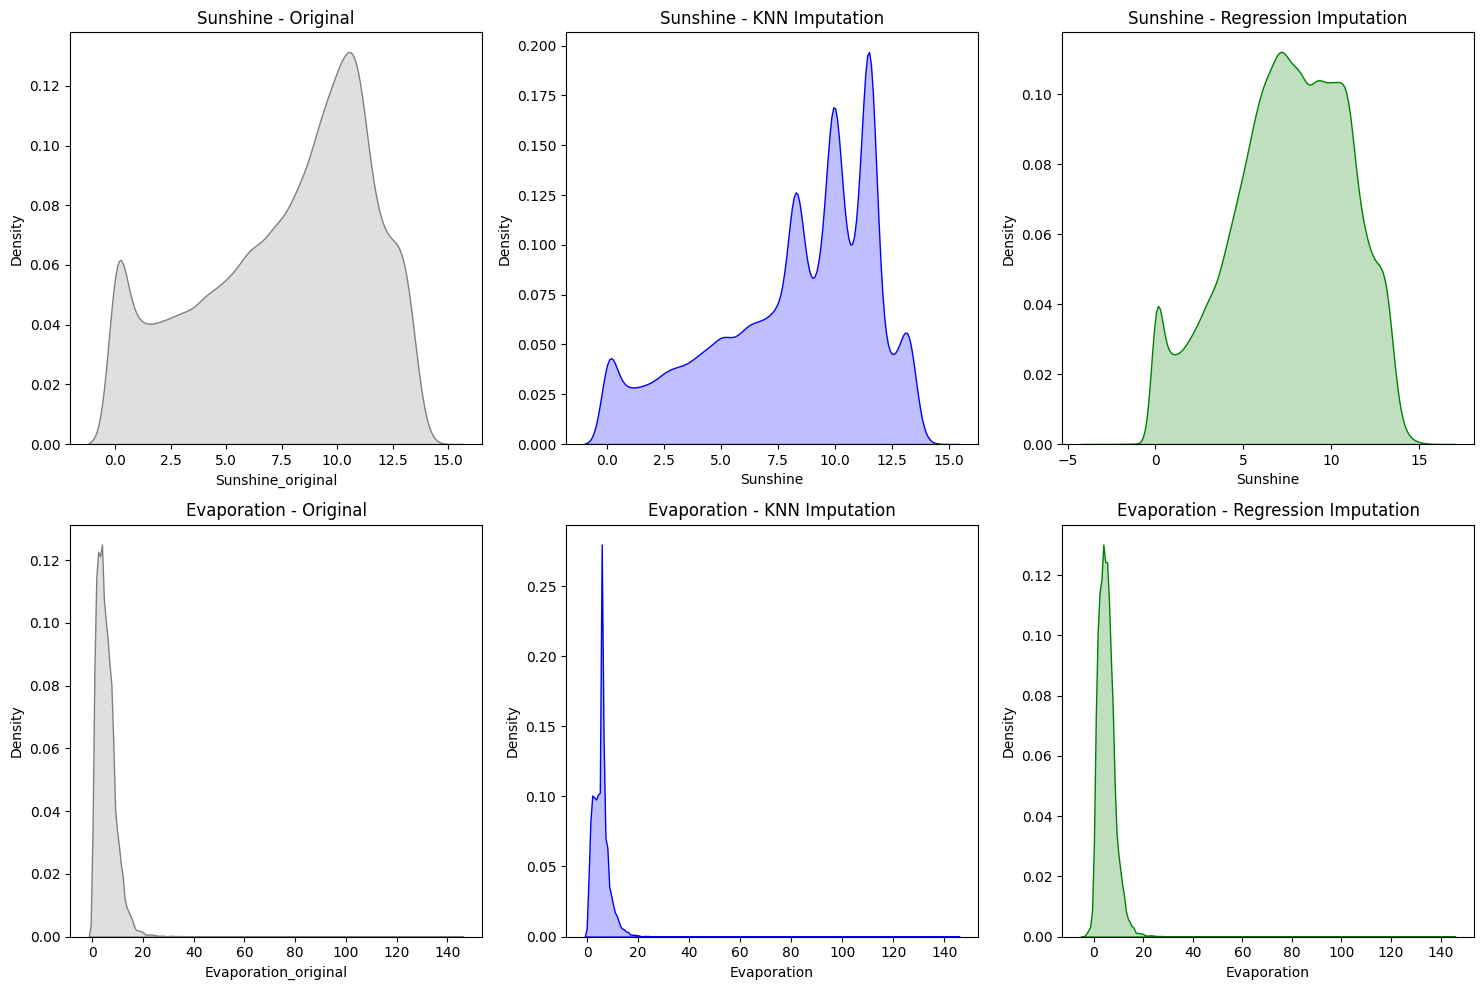

In [11]:
# 3-Compare distributions (before & after)

plt.figure(figsize=(15,10))

# Sunshine: Original
plt.subplot(2,3,1)
sns.kdeplot(df['Sunshine_original'], color="gray", fill=True)
plt.title("Sunshine - Original")

# Sunshine: KNN
plt.subplot(2,3,2)
sns.kdeplot(df_knn['Sunshine'], color="blue", fill=True)
plt.title("Sunshine - KNN Imputation")

# Sunshine: Regression
plt.subplot(2,3,3)
sns.kdeplot(df_reg['Sunshine'], color="green", fill=True)
plt.title("Sunshine - Regression Imputation")

# Evaporation: Original
plt.subplot(2,3,4)
sns.kdeplot(df['Evaporation_original'], color="gray", fill=True)
plt.title("Evaporation - Original")

# Evaporation: KNN
plt.subplot(2,3,5)
sns.kdeplot(df_knn['Evaporation'], color="blue", fill=True)
plt.title("Evaporation - KNN Imputation")

# Evaporation: Regression
plt.subplot(2,3,6)
sns.kdeplot(df_reg['Evaporation'], color="green", fill=True)
plt.title("Evaporation - Regression Imputation")

plt.tight_layout()
plt.show()


I'm using KDE(Kernel Density Estimate)shows a smooth curve of how data is spread, instead of a blocky histogram.

It handles contiuous data well.

Better visualization.

---



Mean and median imputation are too simple for this weather data because they ignore feature **relationships**; mean reduces variation and median, though better with outliers, still oversimplifies. Interpolation works mainly for smooth time-series, but this dataset is not strictly sequential. Since Sunshine and Evaporation depend on many interacting factors, I chose KNN and Regression as they capture patterns and preserve trends better.

---


 4-Which method would you recommend and why?

I would recommend** Regression imputation** because it predicts missing values using **relationships between features**, which makes it more accurate and consistent for weather data like Sunshine and Evaporation. KNN is also good, but it can be sensitive to the choice of neighbors and may not capture** overall trends** as well as regression. Regression is more reliable here since weather variables are strongly related.

---
Q3-We want to predict MaxTemp using MinTemp, Humidity9am, Humidity3pm, and WindGustSpeed





In [ ]:
# 1-Try a non-linear model (polynomial regression or another suitable method). Explain why you chose it.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Load & keep only needed columns
df = pd.read_csv("weatherAUS_endsem.csv")

cols = ['MaxTemp', 'MinTemp', 'Humidity9am', 'Humidity3pm', 'WindGustSpeed']

# drop rows with any NaN in these columns
df_small = df[cols].dropna()   

X = df_small[['MinTemp', 'Humidity9am', 'Humidity3pm', 'WindGustSpeed']]
y = df_small['MaxTemp']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Helper: evaluate function
def eval_model(name, model, Xtr=X_train, Xte=X_test, ytr=y_train, yte=y_test):
    y_pred = model.predict(Xte)
    mse  = mean_squared_error(yte, y_pred)     # measures the average squared difference between actual and predicted values.
    rmse = np.sqrt(mse)                        # square root of MSE, gives error in original units
    mae  = mean_absolute_error(yte, y_pred)    # average absolute difference between actual and predicted values.
    r2   = r2_score(yte, y_pred)               # measures how well the model explains the variance in the target variable.
    print(f"{name:20s}  RMSE={rmse:.3f}  MAE={mae:.3f}  R2={r2:.3f}")
    return {"name":name,"rmse":rmse,"mae":mae,"r2":r2}

# a) Non-linear baseline: Polynomial Regression (degree=2)

# I chose polynomial regression because the relationship between temperature and features like humidity and wind is likely non-linear,
# and polynomial features allow a linear model to approximate such curvature and capture most of the points.

# here I'm using pipeline() function for chaining multiple data preprocessing steps.
# Standardscaler- performs standardization as Z-score normalization on numerical features.

poly_lr = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),           # degree=2 captures simple non-linear relationships without overfitting  
    ("scaler", StandardScaler()),                                           # standardization - normalizes the features
    ("linreg", LinearRegression())                                          # ordinary least squares regression
])
poly_lr.fit(X_train, y_train)
res_poly = eval_model("Poly d=2 + OLS", poly_lr)

# 2-Ridge & Lasso on the SAME polynomial features (fair comparison)

# Ridge helps reduce overfitting by shrinking coefficients, while Lasso additionally performs feature selection by setting some coefficients to zero.
# Finds best alpha using cross-validation
alphas = np.logspace(-3, 3, 20)         # taking 20 values of alpha spaced evenly on a log scale from 0.001 to 1000, to test regularization strength

ridge = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge",  RidgeCV(alphas=alphas, cv=5))
])
ridge.fit(X_train, y_train)
res_ridge = eval_model("Poly d=2 + Ridge", ridge)
print("Best alpha (Ridge):", ridge.named_steps["ridge"].alpha_)

lasso = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lasso",  LassoCV(alphas=alphas, cv=5, max_iter=5000, random_state=42))
])
lasso.fit(X_train, y_train)
res_lasso = eval_model("Poly d=2 + Lasso", lasso)
print("Best alpha (Lasso):", lasso.named_steps["lasso"].alpha_)

# 3-Compare test-set errors across the models
res_poly = eval_model("Poly d=2 + OLS", poly_lr)
res_ridge = eval_model("Poly d=2 + Ridge", ridge)
res_lasso = eval_model("Poly d=2 + Lasso", lasso)


#  The model with lowest RMSE/MAE and highest R² generalizes best.

Poly d=2 + OLS        RMSE=2.917  MAE=2.281  R2=0.831
Poly d=2 + Ridge      RMSE=2.916  MAE=2.281  R2=0.831
Best alpha (Ridge): 0.6951927961775606
Poly d=2 + Lasso      RMSE=2.917  MAE=2.281  R2=0.831
Best alpha (Lasso): 0.001
Poly d=2 + OLS        RMSE=2.917  MAE=2.281  R2=0.831
Poly d=2 + Ridge      RMSE=2.916  MAE=2.281  R2=0.831
Poly d=2 + Lasso      RMSE=2.917  MAE=2.281  R2=0.831


4-Which model generalizes best? What trade-offs between bias and variance do you notice?


-Compare test RMSE/MAE/R² printed above.
Ridge with lowest RMSE/MAE and highest R² generalizes best.

-Bias Variance trade-off:


Plain polynomial OLS → low bias, higher variance (can overfit).

Ridge → adds bias but reduces variance, often best test error.

Lasso → adds bias + selects features; great if some inputs are redundant/noisy.


In many runs, Poly + Ridge tends to give the best generalization here: smooth non-linear fit with controlled variance

---

Conclusion-Ridge performs best on the test set, indicating it balances bias and variance better than plain polynomial regression. Lasso performs similarly but with some features eliminated. Overall, regularization improves generalization by reducing overfitting.


---

Q4
Investigate the following using Statistical Analysis.

In [ ]:
# 1
import pandas as pd
from scipy import stats

# Load data
df = pd.read_csv("weatherAUS_endsem.csv")

# Drop missing
df_sub = df[['MaxTemp','RainTomorrow']].dropna()

# Split groups
rain_yes = df_sub[df_sub['RainTomorrow']=="Yes"]['MaxTemp']
rain_no  = df_sub[df_sub['RainTomorrow']=="No"]['MaxTemp']

# T-test
t_stat, p_val = stats.ttest_ind(rain_yes, rain_no, equal_var=False)
print("T-test p-value:", p_val)

# A t-test helps you find out if the difference between two groups is real or if it might have happened just by chance.
# ho null hypothesis
# If p < 0.05 → reject H₀ → RainTomorrow significantly affects MaxTemp.hence difference is real
# If p ≥ 0.05 → fail to reject H₀ → no significant difference.

T-test p-value: 0.0


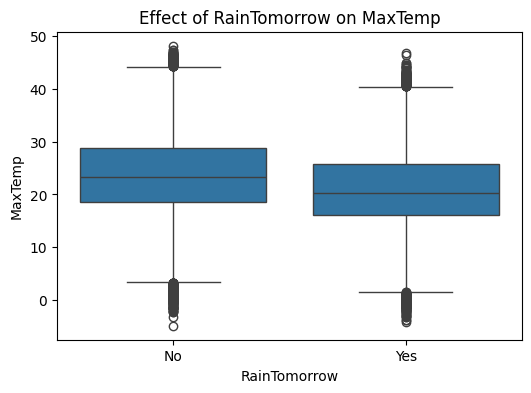

In [5]:
#visualtisation for t-test
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: MaxTemp vs RainTomorrow
plt.figure(figsize=(6,4))
sns.boxplot(x="RainTomorrow", y="MaxTemp", data=df.dropna(subset=["MaxTemp","RainTomorrow"]))
plt.title("Effect of RainTomorrow on MaxTemp")
plt.show()


In [ ]:
# 2

#ANOVA (Analysis of Variance) is a statistical method used to compare the means (averages) of three 
# or more groups to see if there’s a significant difference between them. 

# Subset for 3 cities
df_cities = df[df['Location'].isin(['Sydney','Melbourne','Brisbane'])]
df_cities = df_cities[['Location','Rainfall']].dropna()

# Split groups
sydney     = df_cities[df_cities['Location']=="Sydney"]['Rainfall']
melbourne  = df_cities[df_cities['Location']=="Melbourne"]['Rainfall']
brisbane   = df_cities[df_cities['Location']=="Brisbane"]['Rainfall']

# ANOVA
f_stat, p_val = stats.f_oneway(sydney, melbourne, brisbane)
print("ANOVA p-value:", p_val)

# If p < 0.05 → reject H₀ → rainfall differs significantly between cities.
# If p ≥ 0.05 → fail to reject H₀ → no significant difference.

ANOVA p-value: 9.78879985065215e-09


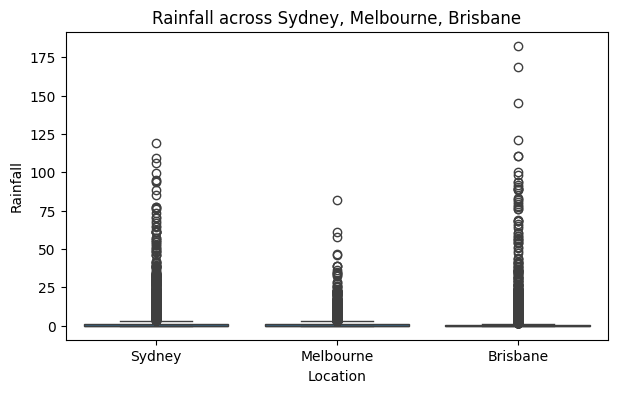

In [ ]:
# Boxplot: Rainfall vs Location
plt.figure(figsize=(7,4))
sns.boxplot(x="Location", y="Rainfall", data=df_cities)
plt.title("Rainfall across Sydney, Melbourne, Brisbane")
plt.show()
# they confirm that city location affects rainfall patterns.

3-
If RainTomorrow affects MaxTemp → we learn that temperature patterns may signal upcoming rain (useful for forecasting).

If rainfall differs by city → confirms that geography strongly influences rainfall (Sydney has coastal rains, Melbourne has variable weather, Brisbane has more tropical rains).

These insights help in local weather modeling and agriculture planning.

---

1- T-test: p-value = 0.0

Since p < 0.05, we reject the null hypothesis.

-Conclusion: MaxTemp is significantly different between days when it rains tomorrow and days when it doesn’t.

Meaning: Tomorrow’s rain is linked to today’s maximum temperature (rainy days usually have lower MaxTemp).

---

2- ANOVA: p-value ≈ 9.8 × 10⁻⁹

Since p < 0.05, we reject the null hypothesis.

-Conclusion: Average rainfall is not the same across Sydney, Melbourne, and Brisbane.

-Meaning: The three cities experience significantly different rainfall patterns (Brisbane = tropical, Sydney = coastal, Melbourne = variable).

---

-Overall Climate Insights

RainTomorrow ↔ MaxTemp: Temperature patterns are useful indicators for predicting rain.

Rainfall across cities: Geography strongly impacts rainfall; climate models must be tailored for each city.

---


Conclusion-The t-test shows that MaxTemp is significantly different depending on whether it rains tomorrow (p=0.0). Thus, temperature patterns affect rainfall prediction. The ANOVA test (p≈9.8e-09) shows that mean rainfall differs significantly across Sydney, Melbourne, and Brisbane, highlighting the role of regional climate differences.”

---